In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans as KM

In [7]:
sample = pd.read_csv('Iris.csv')
sample.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#DATA EXPLORATION

In [9]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
# OUTLIER TREATMENT

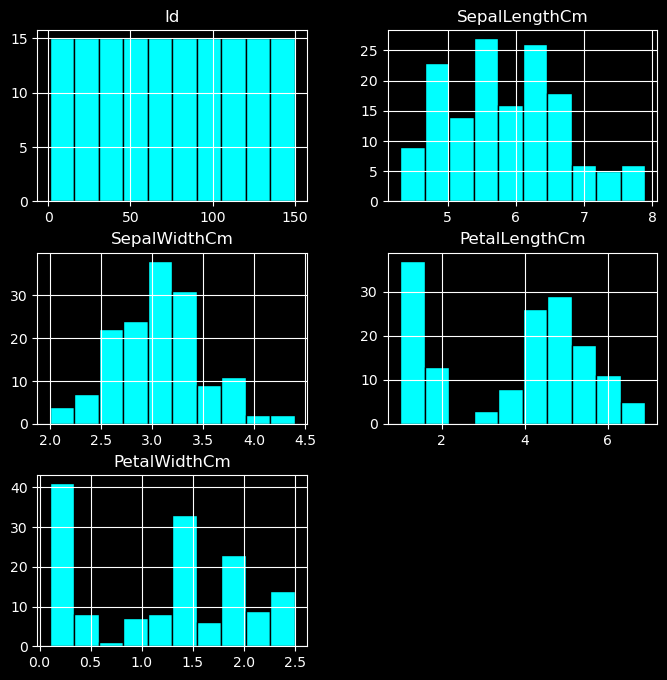

In [11]:
plt.style.use("dark_background")
sample.hist(figsize=(8, 8),color='cyan',edgecolor='k')
plt.show()

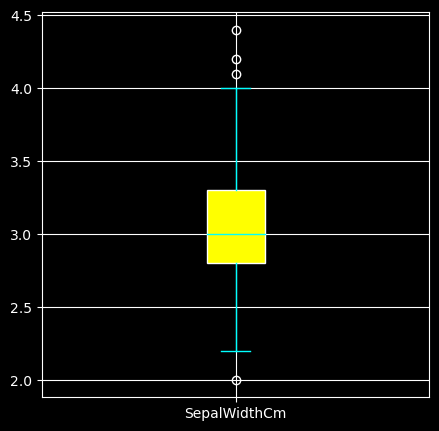

In [12]:
sample.boxplot(column=['SepalWidthCm'],figsize=(5, 5),color='cyan',patch_artist=True,
            boxprops=dict(facecolor='yellow'))
plt.show()

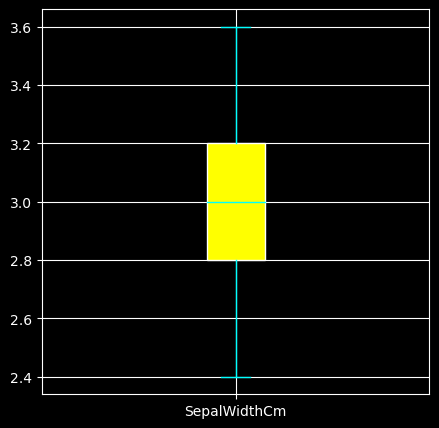

In [13]:
sample['SepalWidthCm'] = np.where(sample['SepalWidthCm'] > sample['SepalWidthCm'].quantile(0.90) ,
                                  sample['SepalWidthCm'].quantile(0.50), sample['SepalWidthCm'])
sample['SepalWidthCm'] = np.where(sample['SepalWidthCm'] < sample['SepalWidthCm'].quantile(0.05) ,
                                  sample['SepalWidthCm'].quantile(0.50), sample['SepalWidthCm'])
sample.boxplot(column=['SepalWidthCm'],figsize=(5, 5), return_type='axes',color='cyan',patch_artist=True,
            boxprops=dict(facecolor='yellow'))
cluster = sample
plt.show()

In [14]:
# ENCODING CATEGORICAL VARIABLE

In [15]:
dummies = pd.get_dummies(sample['Species'], prefix='Species')
sample = pd.concat([sample, dummies], axis=1)
sample.drop('Species', axis=1, inplace=True)
sample.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


In [16]:
#DATA SCALING

In [17]:
from sklearn.preprocessing import MinMaxScaler as MMS
mms = MMS()
mms.fit(sample)
sample = mms.transform(sample)
print(sample)

[[0.         0.22222222 0.91666667 ... 1.         0.         0.        ]
 [0.00671141 0.16666667 0.5        ... 1.         0.         0.        ]
 [0.01342282 0.11111111 0.66666667 ... 1.         0.         0.        ]
 ...
 [0.98657718 0.61111111 0.5        ... 0.         0.         1.        ]
 [0.99328859 0.52777778 0.83333333 ... 0.         0.         1.        ]
 [1.         0.44444444 0.5        ... 0.         0.         1.        ]]


In [18]:
#METHODS TO CALCULATE K

In [19]:
pip install -U yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [29]:
#Elbow method

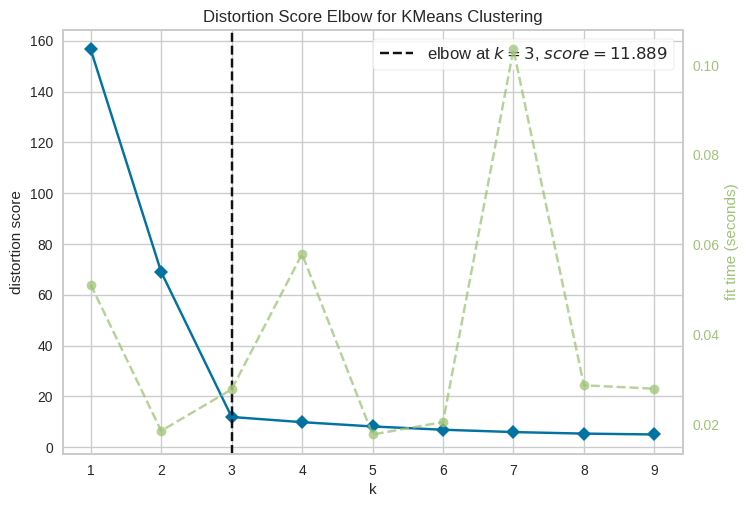

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from sklearn.cluster import KMeans as KM
from yellowbrick.cluster import KElbowVisualizer as KV
model=KM()
elbow = KV(model,k=(1,10))
elbow.fit(sample)
elbow.poof()

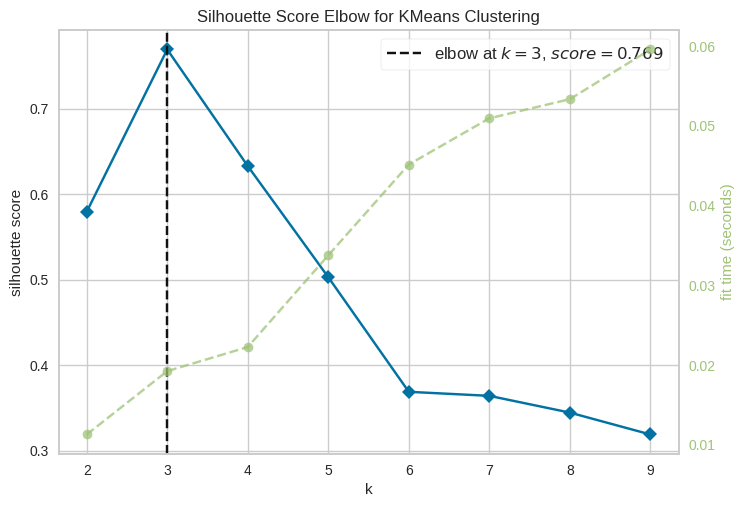

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [21]:
model = KM(sample)
sil = KV(model, k=(2,10),metric='silhouette')
sil.fit(sample)       
sil.poof()

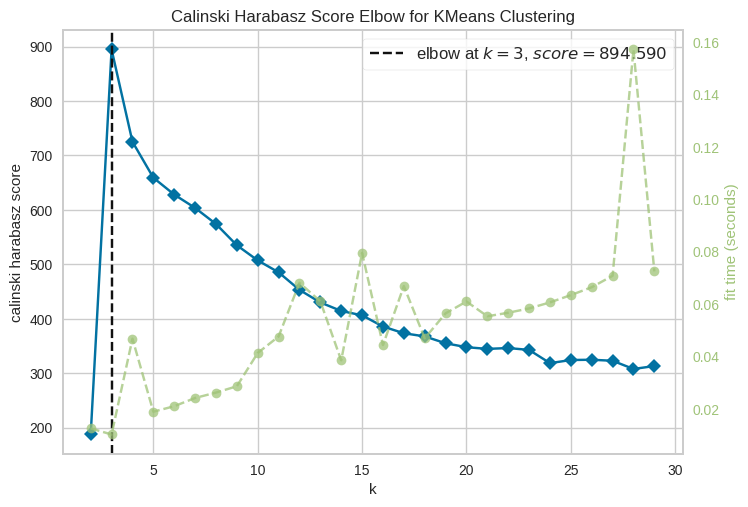

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [24]:
ch_index = KV(model, k=(2,30),metric='calinski_harabasz')
ch_index.fit(sample)       
ch_index.show()     

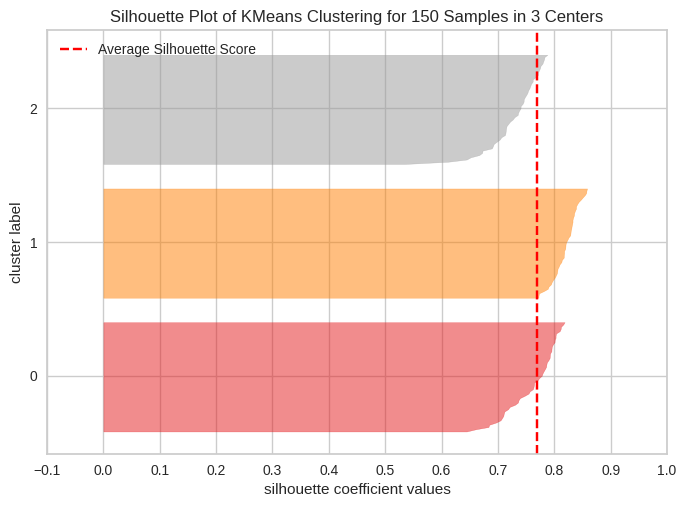

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer as SV
model= KM(3)
sil = SV(model)
sil.fit(sample)
sil.poof()

In [26]:
#DENDROGRAM

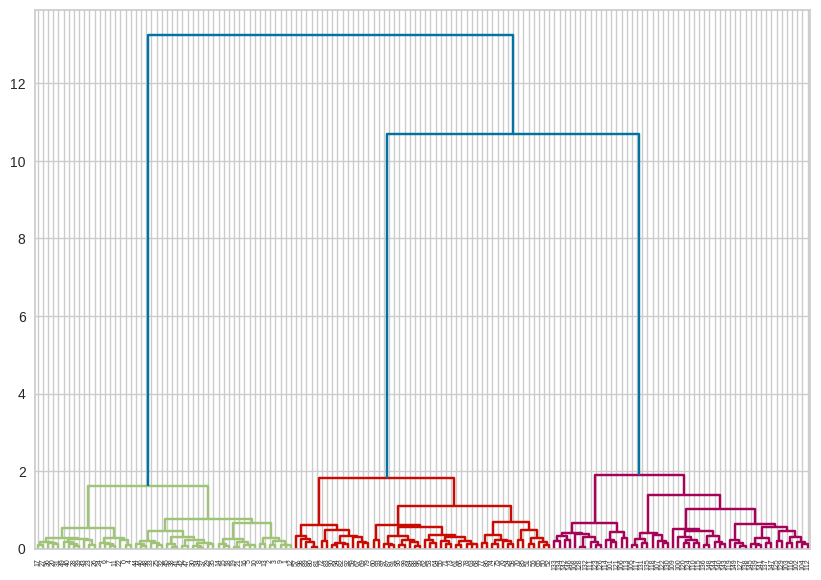

In [23]:
import scipy.cluster.hierarchy as hier
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
dendrogram = hier.dendrogram(hier.linkage(sample, method='ward'))

In [27]:
kmeans = KM(n_clusters= 3)
label = kmeans.fit_predict(sample)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


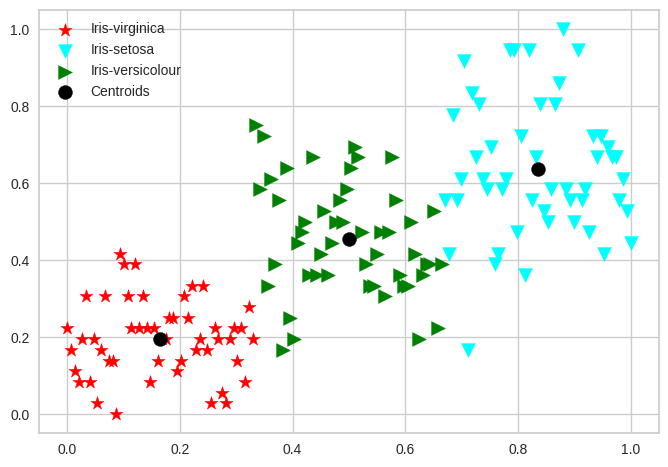

In [28]:
label_0 = sample[label == 0]
label_1 = sample[label == 1]
label_2 = sample[label == 2]
plt.scatter(label_0[:,0] , label_0[:,1] ,marker= '*', s=100, color = 'red', label = 'Iris-virginica')
plt.scatter(label_1[:,0] , label_1[:,1] ,marker= 'v', s=100, color = 'cyan', label = 'Iris-setosa')
plt.scatter(label_2[:,0] , label_2[:,1] ,marker= '>', s=100, color = 'green', label = 'Iris-versicolour')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=100, c = 'black', label = 'Centroids')
plt.legend()